<a href="https://colab.research.google.com/github/ohyunju/projects/blob/ohyunju-patch-1/project1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1일차

---



 ## 프로젝트에 꼭 포함되야 하는 내용
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


---



## 학습 계획
* 1일차 : EDA(데이터 전처리) 및 데이터를 가지고 할 수 있는 계획 수립
* 2일차 : Hypothesis Test, CI, Bayesian, DR, PCA, Cluster 및 시각화
* 3일차 : Hypothesis Test, CI, Bayesian, DR, PCA, Cluster 및 시각화
* 4일차 : 스크립트 제작 및 영상물 촬영


---



In [62]:
import pandas as pd

url='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url)

# Unnamed: 0 는 단순 인덱스넘버이므로 삭제
df = df.drop('Unnamed: 0', axis = 1) 
df.isnull().sum()
# 'Year' 271 / 'Genre' 50 / 'Publisher' 58 의 널값 존재, 전체 가짓 수(16598)에 비해 작다고 판단, 결측치 드랍
df_man=df.dropna()
# 칼럼명 'Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales' 

print(df_man.info())
df_man.head() #(16241 rows × 9 columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB
None


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## 계획 수립
1. 지역에 따라서 선호하는 게임 장르가 다를까 
> **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 선호 장르를 차이를 따지기 위해 **ANOVA**사용 
2. 연도별 게임의 트렌드가 있을까 (게임의 트렌드라는 말을 장르로 인식) 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=장르*로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 
> 위에서 만든 Total_Sales 라는 칼럼을 이용, **누적그래프**를 이용해서 출고량이 제일 많다는 것 보여주기, 출고량 상위 30가지 항목이용
4. 연도별 플랫폼에도 트렌드가 있을까 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=플랫폼*으로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용
5. 제일 선호되는 회사와 지역에 따라서 선호하는 회사가 다를까 
> 전체적으로 랭킹 상위30 (575개의 회사), **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 회사 선호 장르를 차이를 따지기 위해 **ANOVA**사용(자국의 회사를 선호하는지?, 자국인지는 구글링 해보기)
6. 출시이후 평균 판매량은 어떤지 확인하기, 전체적으로 또한 순위 재평가(상위 30개 게임)
> 출시이후 평균 판매량=총판매량/(지금년도-출시년도+1) 라는 수식을 사용(지금의 판매량은 누적이기 때문에 늦게 출시된 제품의 판매량이 떨어질 수 밖에 없다고 판단), 꾸준히 인기가 있는 게임이 있다면 원인은 무엇일까?

# + DR, PCA, Cluster 를 활용할 수 있는 방안 생각하기

### 결과 
이러한 분석들을 통해 전세계를 대상으로한 게임을 출시하려고 한다면 
  * 지역에 따라 게임의 장르, 플랫폼을 다르게 설정해야 하는지
  * 지금 트렌드의 장르로 개발하는 것이 맞는지 (연도별 장르의 추세를 보여줄 수 있는 선 그래프 활용, 약 40년의 기간을 5년의 기간으로 쪼개고 그동안의 장르(12개중 상위 3개씩) 변동 보여주는데 바 그래프 이용)
  * 위 질문에 대한 타탕성의 결과 어떤 게임을 출시해야 한다.


In [63]:
header=['Platform','Year','Genre','Publisher']
for i in header:
  df_check=df_man[i]
  df_check=df_check.drop_duplicates()
  print('길이',i,len(df_check))
  print(df_check)

# 플랫폼에 숫자(2600)가 있길래 잘못 입력인줄 알았는데 구글에 확인하니 이런 플랫폼이 존재 (아타리2600)
# 연도에 이상한 값 있음

길이 Platform 31
0          DS
1         Wii
2         PSP
4         PS3
6          PC
10         PS
11        GBA
18        PS4
20        PS2
22         XB
23       X360
25         GC
33        3DS
37       2600
46        SAT
52         GB
59        NES
65         DC
70        N64
72       XOne
86       SNES
133      WiiU
140       PSV
244       GEN
1034      SCD
2325       WS
2524       NG
7022     TG16
9578      3DO
14865      GG
15709    PCFX
Name: Platform, dtype: object
길이 Year 62
0        2008.0
1        2009.0
2        2010.0
5        2005.0
6        2011.0
          ...  
8144        2.0
8550       13.0
9276        0.0
10811      12.0
15985      94.0
Name: Year, Length: 62, dtype: float64
길이 Genre 12
0           Action
2        Adventure
3             Misc
4         Platform
5           Sports
6       Simulation
10          Racing
12    Role-Playing
13          Puzzle
16        Strategy
24        Fighting
27         Shooter
Name: Genre, dtype: object
길이 Publisher 575
0          

In [64]:
#'Year' 칼럼 100초과로 잡아줌, 전체 가짓 수(16241)에 비해 작다고 판단, 이상치 드랍
df1=df_man[df_man.Year >100]
df1.describe()
df1 #(16141 rows × 9 columns)

df1[10:20]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
11,Harvest Moon: More Friends of Mineral Town,GBA,2003.0,Simulation,Ubisoft,0.14,0.05,0,0
12,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0,0.02,0,0
13,The Professor's Brain Trainer: Logic,DS,2005.0,Puzzle,505 Games,0.02,0,0,0
14,Zoids Dash,DS,2006.0,Role-Playing,Tomy Corporation,0,0,0.02,0
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0,0.06
16,Rise of Nations,PC,2003.0,Strategy,Microsoft Game Studios,0.01,0.02,0,0.01
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0,0,0.03,0
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0,0.03,0
19,Tropico Reloaded,PC,2009.0,Strategy,Kalypso Media,0,0.02,0,0


In [65]:
# Sales 값 들에 대한 데이터 전처리 (K,M)
Sales=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df2=df1
print(len(df2)) 
print(len(df)) 

16141
16598


In [66]:
#시간 줄이는 간단한 방법이 없을까....ㅠㅠ
#인덱스 넘버는 0-16597(갯수는 16141) 개라 시간이 많이 소요****주의(내 컴기준 거의 5분)

for i in Sales:
  df2[i]=df2[i].str.replace('M','')
  for j in range(0,len(df)):
    try:
      if df2[i].str.contains('K')[j]:
        df2[i][j]=df2[i][j].replace('K','')
        df2[i][j]=pd.to_numeric(df2[i][j])*0.001   
    except:
      continue

df2[10:20] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(co

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0,0.06
11,Harvest Moon: More Friends of Mineral Town,GBA,2003.0,Simulation,Ubisoft,0.14,0.05,0,0
12,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0,0.02,0,0
13,The Professor's Brain Trainer: Logic,DS,2005.0,Puzzle,505 Games,0.02,0,0,0
14,Zoids Dash,DS,2006.0,Role-Playing,Tomy Corporation,0,0,0.02,0
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0,0.06
16,Rise of Nations,PC,2003.0,Strategy,Microsoft Game Studios,0.01,0.02,0,0.01
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0,0,0.03,0
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0,0.03,0
19,Tropico Reloaded,PC,2009.0,Strategy,Kalypso Media,0,0.02,0,0


In [67]:
#df2['NA_Sales'].str.endswith('K')[10]  #True
#df2['NA_Sales'][10]=pd.to_numeric(df2['NA_Sales'][10].replace('K',''))*0.001 
#df2['NA_Sales'][10]=df2['NA_Sales'][10].replace('K','')
#df2['NA_Sales'][10]
#df2['NA_Sales'][10]=pd.to_numeric(df2['NA_Sales'][10])*0.001
#df2['NA_Sales'][10]

#df2['NA_Sales'].str.contains('K')[45] #True

df2[85:94]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
89,Bugs Bunny: Lost in Time,PS,1999.0,Platform,Infogrames,0.22,0.15,0,0.03
90,Tom Clancy's Ghost Recon: Predator,PSP,2010.0,Shooter,Ubisoft,0.07,0.02,0,0.02
91,Death Jr.,PSP,2005.0,Platform,Konami Digital Entertainment,0.17,0,0,0.01
92,Disney Universe,Wii,2011.0,Action,Disney Interactive Studios,0.67,0.3,0,0.1
93,Pac-Man and the Ghostly Adventures 2,PS3,2014.0,Adventure,Namco Bandai Games,0.05,0.04,0,0.02
94,Need for Speed Underground,PC,2003.0,Racing,Electronic Arts,0,0.04,0,0.01
95,Robotron 64,N64,1998.0,Shooter,GT Interactive,0.07,0.02,0,0
96,Gummy Bears Magical Medallion,Wii,2011.0,Platform,Storm City Games,0.02,0,0,0
97,Tony Hawk's Pro Skater 2,N64,2001.0,Sports,Activision,0.59,0.16,0,0.01


In [68]:
df2['Year'] = df2['Year'].astype(int)

for i in Sales:
  df2[i] = df2[i].astype(float)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16141 non-null  object 
 1   Platform     16141 non-null  object 
 2   Year         16141 non-null  int64  
 3   Genre        16141 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16141 non-null  float64
 6   EU_Sales     16141 non-null  float64
 7   JP_Sales     16141 non-null  float64
 8   Other_Sales  16141 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 2일차

---



In [69]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


#### 지역에 따라서 선호하는 게임 장르가 다를까 
> **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 선호 장르를 차이를 따지기 위해 **ANOVA**사용

In [70]:
import pandas as pd
import numpy as np

#장르에 대한 선호도(판매량에 대한 가중치를 줘서)를 보여주기 위해 크로스탭을 한후 곱해줌
obs_NA = pd.crosstab(df2['Genre'], df2['NA_Sales'])
column=obs_NA.columns
index=obs_NA.index
obs2_NA=np.dot(np.array(obs_NA),np.array(column))
obs_region=pd.DataFrame(data=obs2_NA)
obs_region.columns=['NA_Sales']

obs_EU = pd.crosstab(df2['Genre'], df2['EU_Sales'])
column=obs_EU.columns
obs2_EU=np.dot(np.array(obs_EU),np.array(column))
obs_region['EU_Sales']=obs2_EU

obs_JP = pd.crosstab(df2['Genre'], df2['JP_Sales'])
column=obs_JP.columns
obs2_JP=np.dot(np.array(obs_JP),np.array(column))
obs_region['JP_Sales']=obs2_JP

obs_Other = pd.crosstab(df2['Genre'], df2['Other_Sales'])
column=obs_Other.columns
obs2_Other=np.dot(np.array(obs_Other),np.array(column))
obs_region['Other_Sales']=obs2_Other

#이후 정규화 실시
from sklearn.preprocessing import StandardScaler

obs_region_scaled = StandardScaler().fit_transform(obs_region)
obs_region_scaled=pd.DataFrame(columns=Sales,data=obs_region_scaled)
obs_region_scaled['Genre']=index

print(obs_region_scaled)

obs_region['Genre']=index
obs_region


    NA_Sales  EU_Sales  JP_Sales  Other_Sales         Genre
0   2.137560  2.308232  0.643281     2.364953        Action
1  -1.093075 -0.990038 -0.670864    -0.960241     Adventure
2  -0.584568 -0.722769 -0.233406    -0.572766      Fighting
3   0.161111  0.069932 -0.014424     0.152803          Misc
4   0.367331  0.009135  0.308107    -0.273101      Platform
5  -1.008866 -1.084977 -0.615234    -1.044864        Puzzle
6  -0.013214  0.264656 -0.624969     0.226276        Racing
7  -0.212242 -0.160404  2.925649    -0.202216  Role-Playing
8   0.917151  0.801102 -0.853560     0.715896       Shooter
9  -0.751830 -0.627610 -0.523317    -0.669535    Simulation
10  1.317176  1.259497  0.375875     1.331355        Sports
11 -1.236534 -1.126756 -0.717139    -1.068559      Strategy


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre
0,855.96,512.52,155.73,183.64,Action
1,101.33,63.32,51.79,16.64,Adventure
2,220.11,99.72,86.39,36.10,Fighting
3,394.29,207.68,103.71,72.54,Misc
4,442.46,199.40,129.22,51.15,Platform
5,121.00,50.39,56.19,12.39,Puzzle
6,353.57,234.20,55.42,76.23,Racing
7,307.08,176.31,336.25,54.71,Role-Playing
8,570.89,307.26,37.34,100.82,Shooter
9,181.04,112.68,63.46,31.24,Simulation


# 다시보자 정규화를 하면 평균 0으로 맞춰지는데 당연히 평균비교하는 분석기법의 결과가 1이지 않겠니 윤주야? 내일 다시 한번 보자꾸나 오늘은 이만 자자

In [71]:
#ANOVA, ANOVA는 평균을 비교하는 것이기 때문에 정규화를 하면 평균이 0에 맞춰져서 의미가 없다.
import scipy.stats as stats

F_statistic, pVal = stats.f_oneway(obs_region_scaled['NA_Sales'], obs_region_scaled['EU_Sales'], obs_region_scaled['JP_Sales'], obs_region_scaled['Other_Sales'])
print('데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

#지역에 따라서 선호하는 게임 장르가 다르지 않음

데이터의 일원분산분석 결과 : F=0.000, p=1.00000


In [72]:
#ANOVA, 평균에 차이가 있다는 것이 내가 보고 싶은 것인가?
import scipy.stats as stats

F_statistic, pVal = stats.f_oneway(obs_region['NA_Sales'], obs_region['EU_Sales'], obs_region['JP_Sales'], obs_region['Other_Sales'])
print('데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')


데이터의 일원분산분석 결과 : F=9.033, p=0.00009
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


             NA_Sales  EU_Sales  JP_Sales  Other_Sales
NA_Sales     1.000000  0.986440  0.279676     0.974410
EU_Sales     0.986440  1.000000  0.273205     0.994353
JP_Sales     0.279676  0.273205  1.000000     0.260726
Other_Sales  0.974410  0.994353  0.260726     1.000000


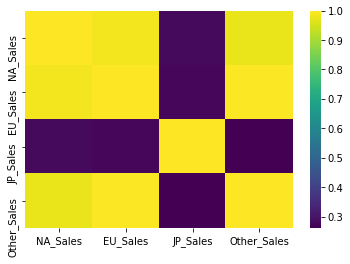

In [73]:
#correlation 으로 확인하는 것이 유의미하다고 판단
corr = obs_region.corr()
print(corr)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, cmap='viridis')
plt.show()

# 이 결과로 다른 지역은 게임의 선호도에 차이가 없지만 일본만 다르게 나타남을 볼 수 있다.

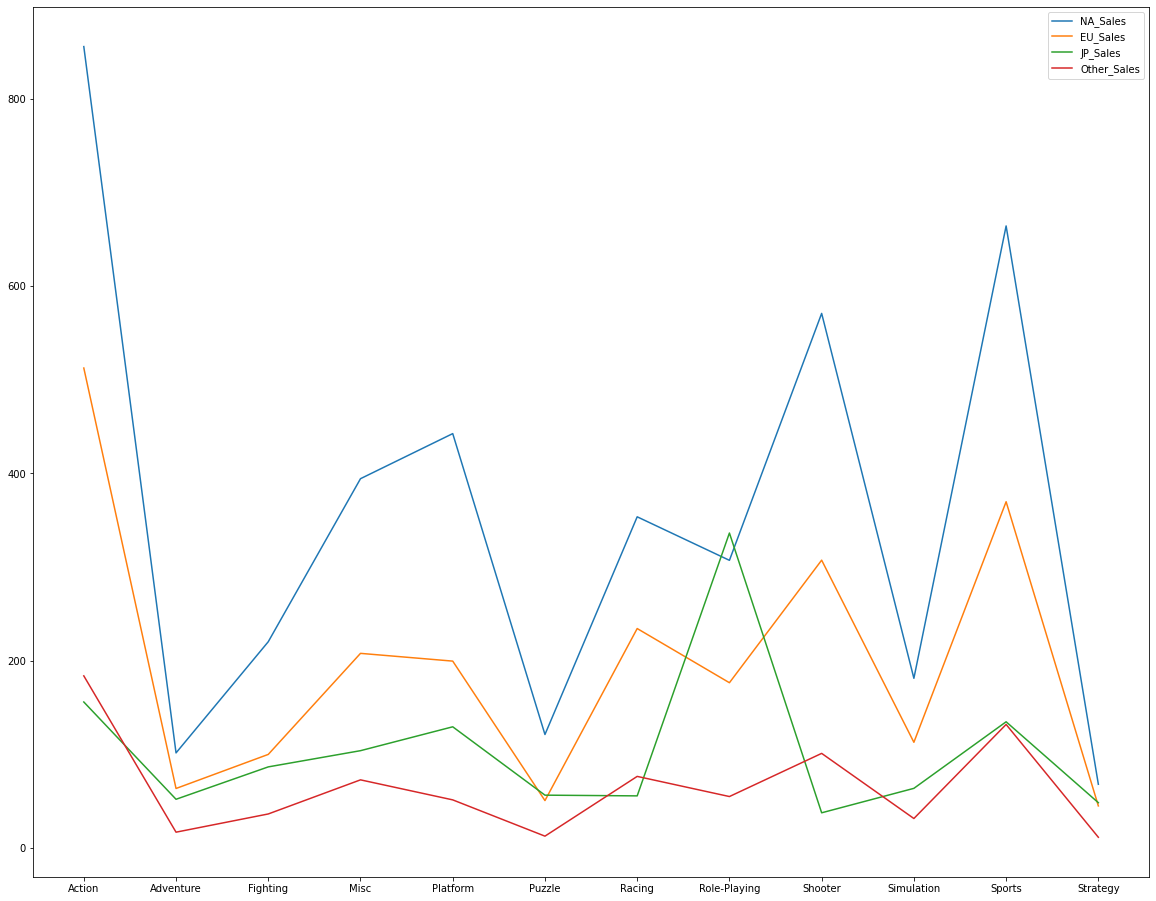

In [74]:
#선 시각화 (정규화 전)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.plot(obs_region['Genre'],obs_region['NA_Sales'])
plt.plot(obs_region['Genre'],obs_region['EU_Sales'])
plt.plot(obs_region['Genre'],obs_region['JP_Sales'])
plt.plot(obs_region['Genre'],obs_region['Other_Sales'])
plt.legend(Sales)
plt.show()

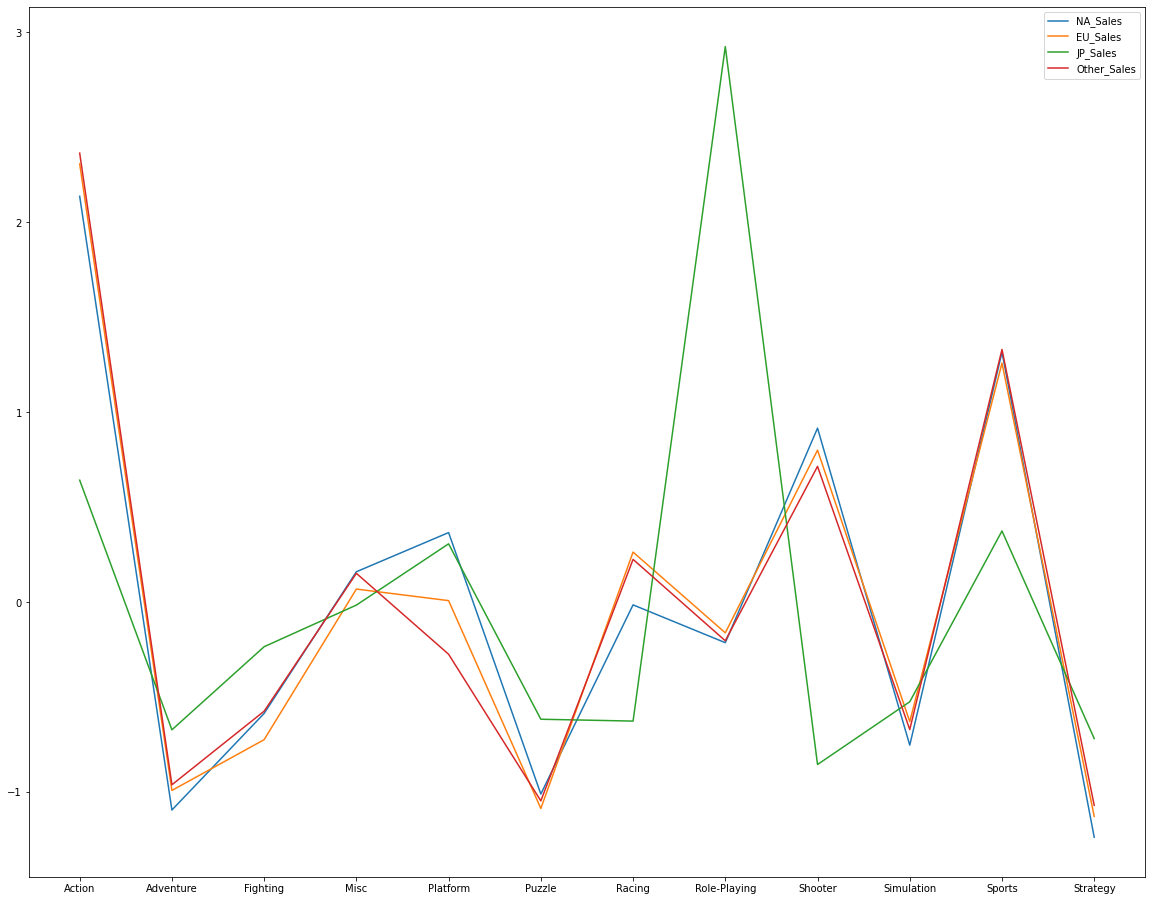

In [75]:
#선 시각화 (정규화 후)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.plot(obs_region_scaled['Genre'],obs_region_scaled['NA_Sales'])
plt.plot(obs_region_scaled['Genre'],obs_region_scaled['EU_Sales'])
plt.plot(obs_region_scaled['Genre'],obs_region_scaled['JP_Sales'])
plt.plot(obs_region_scaled['Genre'],obs_region_scaled['Other_Sales'])
plt.legend(Sales)
plt.show()

In [76]:
''' 효용성 없다고 판단
#바 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.bar(obs_region['Genre'],obs_region['NA_Sales'])
plt.bar(obs_region['Genre'],obs_region['EU_Sales'])
plt.bar(obs_region['Genre'],obs_region['JP_Sales'])
plt.bar(obs_region['Genre'],obs_region['Other_Sales'])
plt.legend(Sales)
plt.show()
'''

" 효용성 없다고 판단\n#바 시각화\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(20, 16))\nplt.bar(obs_region['Genre'],obs_region['NA_Sales'])\nplt.bar(obs_region['Genre'],obs_region['EU_Sales'])\nplt.bar(obs_region['Genre'],obs_region['JP_Sales'])\nplt.bar(obs_region['Genre'],obs_region['Other_Sales'])\nplt.legend(Sales)\nplt.show()\n"

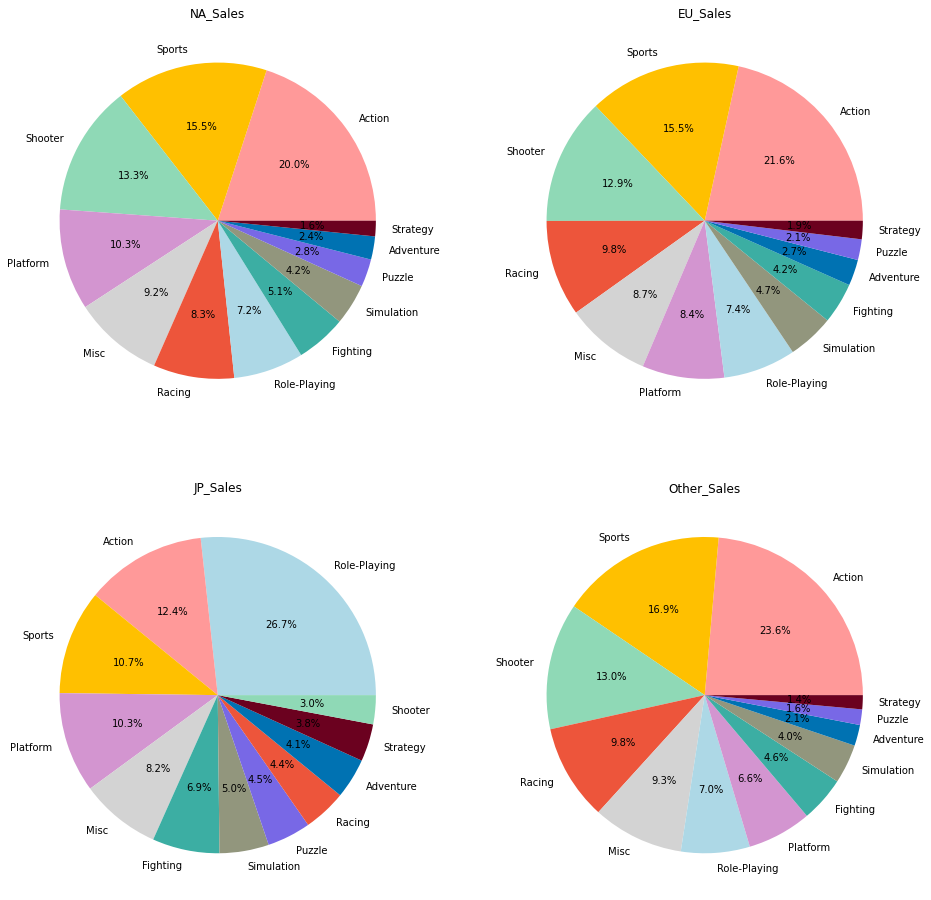

In [77]:
#파이 시각화
import matplotlib.pyplot as plt

obs_region_NA=obs_region.sort_values(by=['NA_Sales'], axis=0, ascending=False)
obs_region_EU=obs_region.sort_values(by=['EU_Sales'], axis=0, ascending=False)
obs_region_JP=obs_region.sort_values(by=['JP_Sales'], axis=0, ascending=False)
obs_region_Other=obs_region.sort_values(by=['Other_Sales'], axis=0, ascending=False)

plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.title('NA_Sales')
plt.pie(obs_region_NA['NA_Sales'], labels=obs_region_NA['Genre'], autopct='%.1f%%',
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#92967D','#7868E6','#0072B2','#6B011F'])
 
plt.subplot(222)
plt.title('EU_Sales')
plt.pie(obs_region_EU['EU_Sales'], labels=obs_region_EU['Genre'], autopct='%.1f%%',
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#ED553B','lightgray','#d395d0','lightblue','#92967D','#3CAEA3','#0072B2','#7868E6','#6B011F'])
 
plt.subplot(223)
plt.title('JP_Sales')
plt.pie(obs_region_JP['JP_Sales'], labels=obs_region_JP['Genre'], autopct='%.1f%%',
        colors = ['lightblue','#ff9999', '#ffc000', '#d395d0','lightgray','#3CAEA3','#92967D','#7868E6','#ED553B','#0072B2','#6B011F','#8fd9b6'])
 
plt.subplot(224)
plt.title('Other_Sales')
plt.pie(obs_region_Other['Other_Sales'], labels=obs_region_Other['Genre'], autopct='%.1f%%',
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#ED553B','lightgray','lightblue','#d395d0','#3CAEA3','#92967D','#0072B2','#7868E6','#6B011F'])

plt.show()

#colors_match=['Action','Sports','Shooter','Platform','Misc','Racing','Role-Playing','Fighting','Adventure','Puzzle','Simulation','Strategy']
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#0072B2','#7868E6','#92967D','#6B011F']

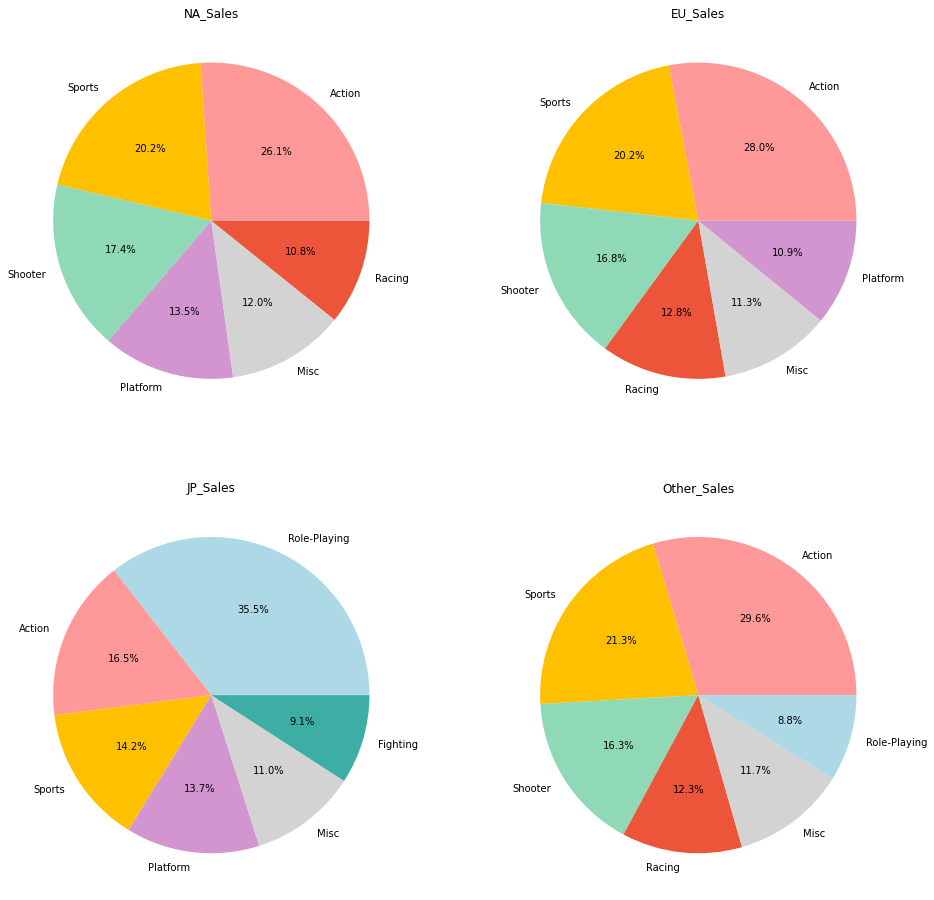

In [78]:
#파이 시각화 (상위 6개 /12개중)
import matplotlib.pyplot as plt

obs_region_NA=obs_region.sort_values(by=['NA_Sales'], axis=0, ascending=False)
obs_region_EU=obs_region.sort_values(by=['EU_Sales'], axis=0, ascending=False)
obs_region_JP=obs_region.sort_values(by=['JP_Sales'], axis=0, ascending=False)
obs_region_Other=obs_region.sort_values(by=['Other_Sales'], axis=0, ascending=False)

plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.title('NA_Sales')
plt.pie(obs_region_NA['NA_Sales'][0:6], labels=obs_region_NA['Genre'][0:6], autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B'])
 
plt.subplot(222)
plt.title('EU_Sales')
plt.pie(obs_region_EU['EU_Sales'][0:6], labels=obs_region_EU['Genre'][0:6], autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#ED553B','lightgray','#d395d0'])
 
plt.subplot(223)
plt.title('JP_Sales')
plt.pie(obs_region_JP['JP_Sales'][0:6], labels=obs_region_JP['Genre'][0:6], autopct='%.1f%%',colors = ['lightblue','#ff9999', '#ffc000', '#d395d0','lightgray','#3CAEA3'])
 
plt.subplot(224)
plt.title('Other_Sales')
plt.pie(obs_region_Other['Other_Sales'][0:6], labels=obs_region_Other['Genre'][0:6], autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#ED553B','lightgray','lightblue'])

plt.show()

#### 연도별 게임의 트렌드가 있을까 (게임의 트렌드라는 말을 장르로 인식) 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=장르*로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용


In [79]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [80]:
year_genre=df2[['Year','Genre']]

Total_Sales=df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
year_genre['Total_Sales']=Total_Sales
year_genre.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Year,Genre,Total_Sales
0,2008,Action,0.04
1,2009,Action,0.18
2,2010,Adventure,0.02
3,2010,Misc,0.04
4,2010,Platform,0.25


In [81]:
year_genre_com = pd.crosstab(df2['Genre'], df2['Year'])
year_genre_com


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,3,5,1,6,4,7,20,29,44,39,43,66,125,144,124,191,182,210,218,270,226,238,263,148,186,250,117,1,0
Adventure,0,0,0,1,0,0,0,1,0,0,0,2,4,1,4,13,16,14,23,19,16,20,41,12,38,42,71,84,165,140,153,106,57,60,75,53,33,0,0
Fighting,1,0,0,0,0,1,0,2,0,0,0,1,7,11,21,28,30,28,41,24,29,18,54,44,39,43,54,50,56,53,40,49,29,19,22,21,14,0,0
Misc,4,0,1,1,1,0,0,0,0,1,0,1,2,3,6,22,23,12,21,25,20,26,44,53,67,110,109,150,208,204,200,183,37,41,41,38,17,0,0
Platform,0,3,5,5,1,4,5,2,4,3,3,6,6,11,11,13,14,18,24,18,23,43,77,84,64,82,54,42,62,28,31,37,11,37,10,14,10,0,0
Puzzle,0,2,3,1,3,4,0,0,1,5,2,4,5,3,3,12,9,14,13,6,12,15,20,7,24,32,42,63,63,78,44,41,11,3,7,6,0,0,0
Racing,0,1,2,0,3,0,1,0,1,0,2,1,2,2,8,12,20,36,47,49,43,70,102,107,70,76,75,83,82,83,57,63,30,16,27,19,19,0,0
Role-Playing,0,0,0,0,0,0,1,3,3,2,2,5,5,9,17,24,28,23,26,32,29,41,54,48,60,70,108,103,112,103,99,93,78,70,90,77,40,2,0
Shooter,2,10,5,1,3,1,4,2,1,1,0,3,3,2,11,28,23,27,23,16,19,36,78,73,88,96,67,84,82,89,80,92,47,59,47,34,31,0,0


In [82]:
#그냥 크로스탭을 하면 0,1로 유무 판단의 합계가 되므로, Total_Sales의 합으로 값을 채우는 것이 더 의미있다고 판단
year_genre_com = pd.crosstab(index=year_genre['Genre'], columns=year_genre['Year'],values=year_genre['Total_Sales'], aggfunc = np.sum)
year_genre_com=year_genre_com.fillna(0)
year_genre_com

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,1.74,4.65,6.39,6.76,3.84,1.81,1.55,3.13,20.60,27.22,39.41,27.62,33.89,56.68,86.65,67.98,75.94,85.07,63.72,105.99,134.88,138.13,117.50,118.95,120.78,125.21,99.01,68.20,19.83,0.01,0.00
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,0.00,0.00,0.00,2.24,12.24,0.07,3.74,0.71,3.36,4.97,9.04,7.61,2.96,8.96,11.07,2.12,8.45,8.53,11.48,24.44,24.87,20.65,16.57,15.82,5.90,6.61,6.09,8.01,1.79,0.00,0.00
Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,0.00,0.00,0.00,0.39,15.23,8.75,8.45,14.56,18.04,11.80,31.68,14.31,20.26,18.10,24.92,23.79,16.76,19.68,22.51,17.63,34.91,32.18,14.88,22.11,9.53,7.21,15.77,7.78,3.85,0.00,0.00
Misc,2.70,0.00,0.87,2.14,1.45,0.00,0.00,0.00,0.00,1.28,0.00,0.08,4.94,0.30,2.86,6.39,10.66,5.68,11.84,20.68,15.55,16.39,15.56,23.79,26.10,59.69,67.23,91.07,86.01,76.36,88.40,55.77,22.63,25.47,23.73,11.51,1.09,0.00,0.00
Platform,0.00,6.92,5.03,6.93,0.69,43.17,8.34,1.74,27.73,20.66,22.98,7.63,13.41,18.68,28.76,16.69,28.23,21.86,28.93,20.80,15.96,39.33,45.95,39.85,46.59,22.81,49.70,35.53,35.65,40.95,31.98,28.12,18.54,25.09,8.87,6.05,2.08,0.00,0.00
Puzzle,0.00,2.25,10.04,0.78,3.14,3.21,0.00,0.00,5.58,37.75,5.99,3.24,4.84,3.17,1.53,2.69,3.92,5.87,6.35,1.34,3.83,7.94,5.33,1.71,8.36,20.26,10.79,23.34,15.50,20.27,11.11,4.91,1.74,1.00,1.50,0.69,0.00,0.00,0.00
Racing,0.00,0.48,1.57,0.00,5.95,0.00,1.96,0.00,2.14,0.00,6.25,1.14,9.05,0.36,2.18,6.09,26.95,31.92,26.69,37.19,20.00,55.13,30.02,51.09,45.61,56.34,34.06,38.94,70.73,34.09,34.93,34.86,14.43,13.02,16.71,7.92,1.62,0.00,0.00
Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.52,4.65,5.88,2.20,4.52,3.26,6.86,5.59,7.13,14.27,43.99,21.82,28.09,47.24,29.04,22.02,45.09,30.29,53.95,28.42,51.79,43.86,59.69,47.96,52.91,43.95,47.77,30.54,45.88,36.38,6.75,0.04,0.00
Shooter,7.07,10.02,3.81,0.49,31.10,1.00,3.89,0.69,0.51,1.19,0.00,1.99,0.28,3.08,8.30,3.53,6.90,22.16,9.80,12.23,6.81,24.81,47.64,27.10,46.92,41.57,37.24,70.88,59.25,69.65,77.36,97.85,72.38,62.73,65.99,66.12,13.97,0.00,0.00


Genre           Action  Adventure  Fighting  ...  Simulation    Sports  Strategy
Genre                                        ...                                
Action        1.000000   0.792114  0.675700  ...    0.736503  0.817774  0.593302
Adventure     0.792114   1.000000  0.757178  ...    0.808612  0.833515  0.669260
Fighting      0.675700   0.757178  1.000000  ...    0.694537  0.782690  0.765346
Misc          0.820532   0.886349  0.675890  ...    0.888866  0.898080  0.646911
Platform      0.523229   0.543746  0.657495  ...    0.551400  0.685245  0.556586
Puzzle        0.313224   0.451450  0.291171  ...    0.558585  0.456723  0.243332
Racing        0.694220   0.716478  0.819730  ...    0.839328  0.754995  0.756033
Role-Playing  0.849307   0.761008  0.793850  ...    0.677147  0.827384  0.744637
Shooter       0.932743   0.735384  0.525580  ...    0.619463  0.729978  0.474792
Simulation    0.736503   0.808612  0.694537  ...    1.000000  0.796045  0.609661
Sports        0.817774   0.8

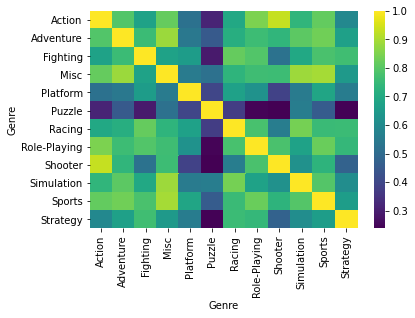

In [83]:
#correlation 으로 확인하는 것이 유의미하다고 판단
corr_year_genre = year_genre_com.T.corr()
print(corr_year_genre)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_year_genre, cmap='viridis')
plt.show()

In [84]:
# 연도, 장르 두 변수간 연관성 유무를 확인하기 위해 chi2_contingency 테스트 사용
from scipy.stats import chi2_contingency
'''
chi2_contingency 결과 해석
1 : x2 statistic // 2 : p-value // 3 : degree of freedom // 4 : expected value for Observed
'''
print(chi2_contingency(year_genre_com, correction = False)[1]) 
print(chi2_contingency(year_genre_com, correction = True)[1])

# 두 경우 모두 pvalue : 0.0 , 연도와 장르 간 연관이 있다.

0.0
0.0


In [85]:
'''
year_genre2=year_genre
cols = ['Year', 'Genre']
year_genre2['Year_Genre'] = year_genre2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
year_genre2=year_genre2[['Year_Genre','Total_Sales']]
year_genre2=year_genre2.groupby(['Year_Genre']).sum()
year_genre2
'''

"\nyear_genre2=year_genre\ncols = ['Year', 'Genre']\nyear_genre2['Year_Genre'] = year_genre2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)\nyear_genre2=year_genre2[['Year_Genre','Total_Sales']]\nyear_genre2=year_genre2.groupby(['Year_Genre']).sum()\nyear_genre2\n"

In [86]:
year_genre3=year_genre
year_genre3=year_genre.groupby(['Genre','Year']).sum()
year_genre3 = year_genre3.reset_index()
year_genre3

,Genre,Year,Total_Sales
0,Action,1980,0.34
1,Action,1981,14.79
2,Action,1982,6.50
3,Action,1983,2.86
4,Action,1984,1.85
...,...,...,...
383,Strategy,2012,3.33
384,Strategy,2013,6.32
385,Strategy,2014,0.97
386,Strategy,2015,1.82


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


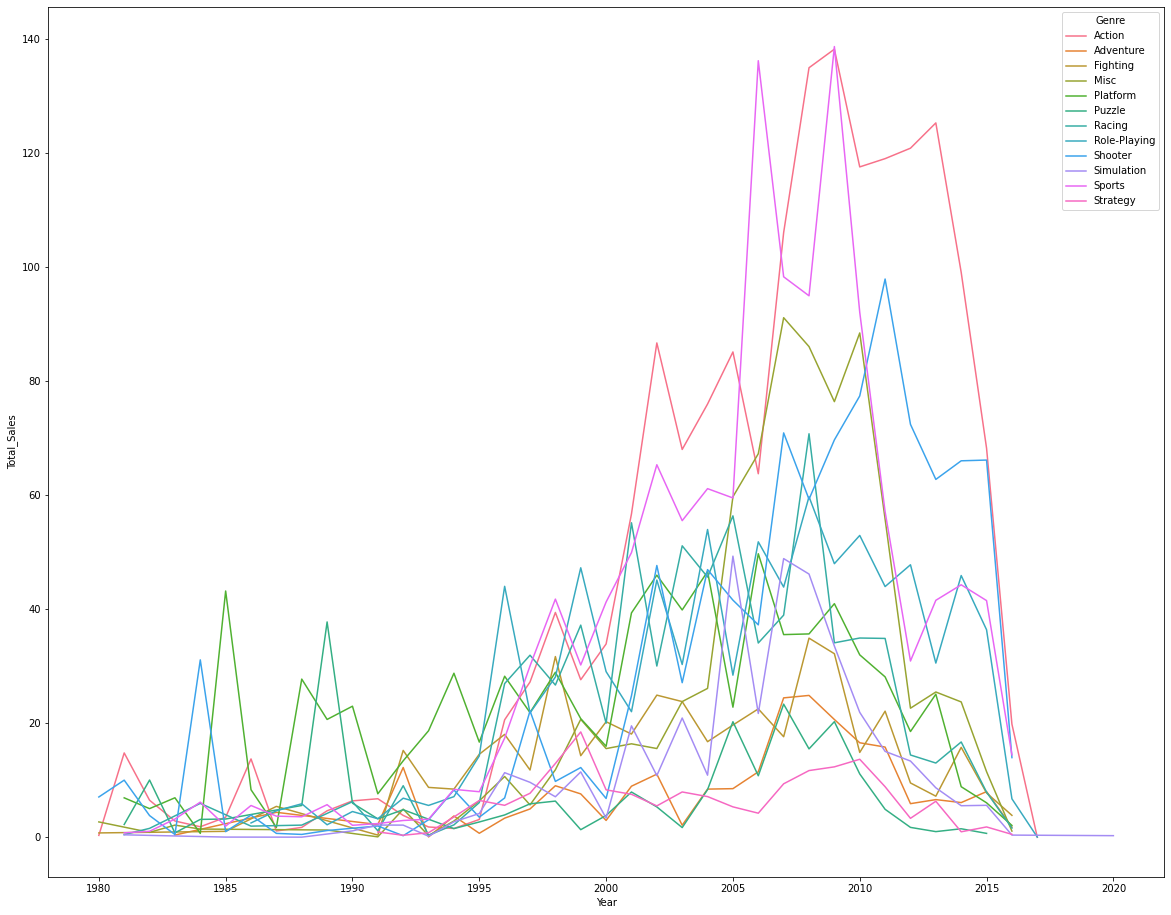

In [87]:
#선 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
sns.lineplot(year_genre3['Year'],year_genre3['Total_Sales'],hue=year_genre3['Genre'])
plt.show()

In [88]:
year_genre_ANOVA=year_genre_com.T
Genre=year_genre_ANOVA.columns
#print(year_genre_ANOVA)

'''
from sklearn.preprocessing import StandardScaler

year_genre_ANOVA = StandardScaler().fit_transform(year_genre_ANOVA)
year_genre_ANOVA=pd.DataFrame(columns=Genre,data=year_genre_ANOVA)
print(year_genre_ANOVA)
'''
import scipy.stats as stats

F_statistic, pVal = stats.f_oneway(
year_genre_ANOVA['Action'],
year_genre_ANOVA['Sports'],
year_genre_ANOVA['Shooter'],
year_genre_ANOVA['Platform'],
year_genre_ANOVA['Misc'],
year_genre_ANOVA['Racing'],
year_genre_ANOVA['Role-Playing'],
year_genre_ANOVA['Fighting'],
year_genre_ANOVA['Adventure'],
year_genre_ANOVA['Puzzle'],
year_genre_ANOVA['Simulation'],
year_genre_ANOVA['Strategy']
)
print('데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

# 장르라는 그룹들 간의 차이가 있다

데이터의 일원분산분석 결과 : F=9.937, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


# 3일차


---



#### 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 
> 위에서 만든 Total_Sales 라는 칼럼을 이용, **누적그래프**를 이용해서 출고량이 제일 많다는 것 보여주기, 출고량 상위 30가지 항목이용


In [89]:
print(df2.shape)
df2.head()

(16141, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [90]:
Top_Sale=df2[['Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Top_Sale['Total_Sales']=df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
Top_Sale=Top_Sale.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Top_Sale[0:10]
#Publisher가 다 Nintendo네?
print(df2)
print(Top_Sale)

                                                 Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...        0.00
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.00
3                    Deal or No Deal: Special Edition  ...        0.00
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.01
16594                     Rainbow Islands: Revolution  ...        0.00
16595                                        NBA 2K16  ...        0.13
16596                     Toukiden: The Age of Demons  ...        0.03
16597                        The King of Fighters '95  ...        0.01

[16141 rows x 9 columns]
      Platform  Year         Genre  ... JP_Sales  Other_Sales  Total_Sales
2908       Wii  2006        Sports  ...     3.7

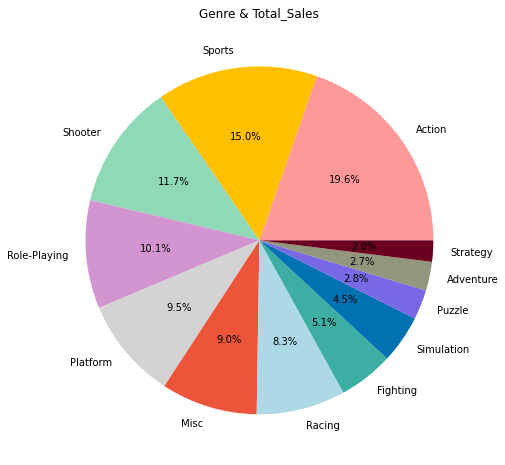

In [91]:
#파이 시각화 (장르, 12개)
import matplotlib.pyplot as plt

Top_Sale_Genre=Top_Sale.groupby(['Genre']).sum()
Top_Sale_Genre=Top_Sale_Genre.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Genre=Top_Sale_Genre.index

plt.figure(figsize=(8, 8))
plt.title('Genre & Total_Sales')
plt.pie(Top_Sale_Genre['Total_Sales'], labels=Genre, autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#0072B2','#7868E6','#92967D','#6B011F'])

plt.show()

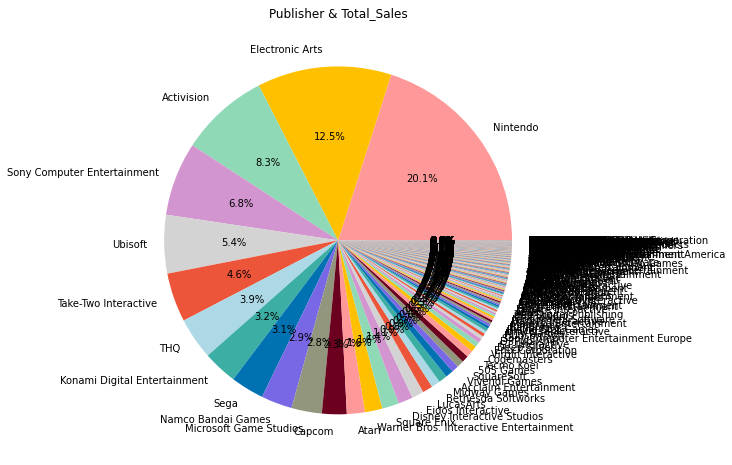

In [92]:
#파이 시각화 (퍼블리셔, 575개)
import matplotlib.pyplot as plt

Top_Sale_Publisher=Top_Sale.groupby(['Publisher']).sum()
Top_Sale_Publisher=Top_Sale_Publisher.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Publisher=Top_Sale_Publisher.index

plt.figure(figsize=(8, 8))
plt.title('Publisher & Total_Sales')
plt.pie(Top_Sale_Publisher['Total_Sales'], labels=Publisher, autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#0072B2','#7868E6','#92967D','#6B011F'])

plt.show()

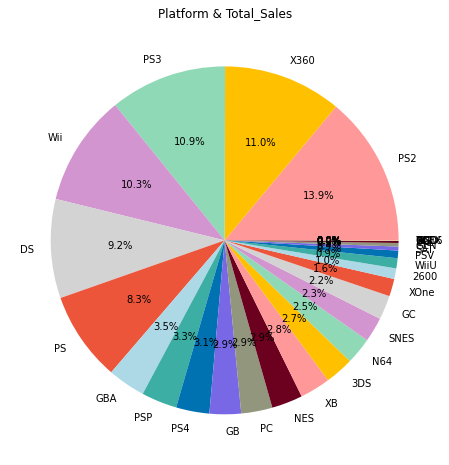

In [93]:
#파이 시각화 (플랫폼, 62개)
import matplotlib.pyplot as plt

Top_Sale_Platform=Top_Sale.groupby(['Platform']).sum()
Top_Sale_Platform=Top_Sale_Platform.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Platform=Top_Sale_Platform.index

plt.figure(figsize=(8, 8))
plt.title('Platform & Total_Sales')
plt.pie(Top_Sale_Platform['Total_Sales'], labels=Platform, autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#0072B2','#7868E6','#92967D','#6B011F'])

plt.show()

총체적으로 5개씩 순위를 메기면, 

**장르** 컬럼에서는 Action, Sports, Shooter, Role-Playing, Platform 순으로 인기가 많고, 

**퍼블리셔** 컬럼에서는 Nintendo, Electronic Arts, Activision, Sony Computer Entertainment, Ubisoft 순으로 인기 많으며,

**플랫폼** 컬럼에서는 PS2, X360, PS3, Wii, DS 순으로 인기가 많으며

이들 모두 상위 5가지가 전체의 **50% 이상**을 차지함을 알 수 있습니다.


In [94]:
Total_Sum=np.sum(Top_Sale['Total_Sales'])
print(Total_Sum)

count=0
for i in range(0,len(Top_Sale)):
  count+=1
  sums=np.sum(Top_Sale['Total_Sales'][0:i])
  if sums/Total_Sum >=0.5:
    print(count,'개가 50퍼센트 이상')
    break

#출고량이 높은 30개의 게임에 대해 분석을 진행 하려고 하였으나 전체 판매량의 50%를 분석하는 것이 유의미하다고 판단, 상위 1073개로 분석
#총 16141개의 50%의 판매량을 차지하는 것은 1073개로, 6%에 지나지 않음.
Top_Sales=Top_Sale[:][0:1073]
Top_Sales.shape

8694.349999999999
1073 개가 50퍼센트 이상


(1073, 9)

In [95]:
Top_Sales2 = pd.crosstab(Top_Sales['Genre'], Top_Sales['Platform'])
Top_Sales2

Platform,2600,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,,,,
Action,2,6,0,11,3,7,3,1,4,6,2,22,36,38,14,4,1,0,1,12,1,33,4,3
Adventure,0,0,0,1,4,1,1,0,0,1,2,3,1,4,0,0,0,0,0,0,0,2,0,0
Fighting,0,1,0,0,0,0,1,1,3,2,0,10,19,6,1,2,0,1,5,1,1,4,1,0
Misc,0,1,0,14,2,3,3,0,3,1,3,5,12,4,1,0,1,0,1,27,2,10,0,1
Platform,1,4,1,7,10,11,2,4,6,8,0,10,13,4,2,3,0,0,8,13,4,0,0,0
Puzzle,2,1,0,12,5,2,0,0,0,3,0,1,1,0,0,0,0,0,1,2,0,0,0,0
Racing,0,1,1,1,1,1,1,0,5,3,0,11,19,11,4,4,0,0,2,1,1,11,3,2
Role-Playing,0,10,0,13,6,9,2,0,0,4,7,8,8,12,5,4,0,0,8,1,0,11,3,1
Shooter,3,0,0,0,0,0,1,0,2,1,6,6,18,25,14,3,1,0,1,3,1,38,5,11


In [96]:
Top_Sales3=Top_Sales.groupby(['Publisher']).sum()
Top_Sales3=Top_Sales3[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
Top_Sales3=Top_Sales3.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Top_Sales3[0:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Nintendo,694.32,363.61,342.85,82.77,1483.55
Electronic Arts,236.39,190.67,7.40,66.88,501.34
Activision,215.26,129.81,5.52,43.74,394.33
Sony Computer Entertainment,160.36,112.97,37.44,45.14,355.91
Take-Two Interactive,135.02,78.62,5.12,39.87,258.63
Ubisoft,98.35,72.13,2.88,22.56,195.92
Microsoft Game Studios,120.73,50.45,2.03,14.43,187.64
THQ,53.91,32.65,2.12,9.31,97.99
Konami Digital Entertainment,25.55,28.38,16.17,16.05,86.15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

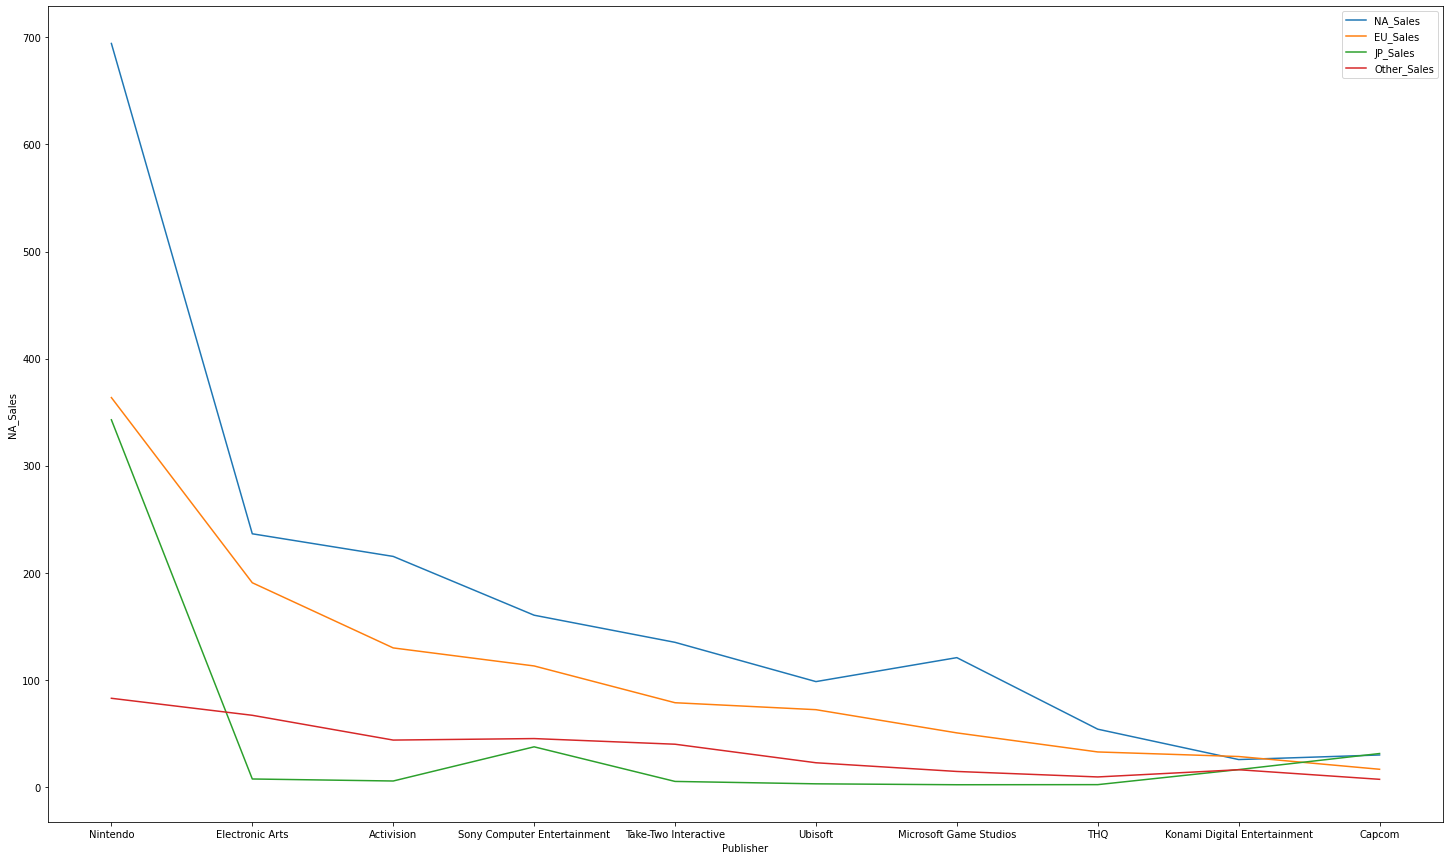

In [97]:
#선 시각화
import seaborn as sns
import matplotlib.pyplot as plt

Publisher=Top_Sales3.index[0:10]
plt.figure(figsize=(25, 15))
sns.lineplot(Publisher,Top_Sales3['NA_Sales'][0:10])
sns.lineplot(Publisher,Top_Sales3['EU_Sales'][0:10])
sns.lineplot(Publisher,Top_Sales3['JP_Sales'][0:10])
sns.lineplot(Publisher,Top_Sales3['Other_Sales'][0:10])
#sns.lineplot(Publisher,Top_Sales3['Total_Sales'][0:10])
plt.legend(Top_Sales3.columns)
plt.show()

In [98]:
Top_Sales4=Top_Sales.groupby(['Genre']).sum()
Top_Sales4=Top_Sales4[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
Top_Sales4=Top_Sales4.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Top_Sales4

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,384.07,260.42,54.52,95.01,794.02
Shooter,356.25,185.59,14.78,63.52,620.14
Sports,271.94,192.32,50.69,70.87,585.82
Platform,291.47,130.42,94.49,31.35,547.73
Role-Playing,178.48,109.96,161.10,28.91,478.45
Misc,184.85,109.33,41.87,33.53,369.58
Racing,163.63,119.35,37.34,41.13,361.45
Fighting,98.11,44.79,29.28,15.63,187.81
Simulation,72.58,63.75,23.04,13.74,173.11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

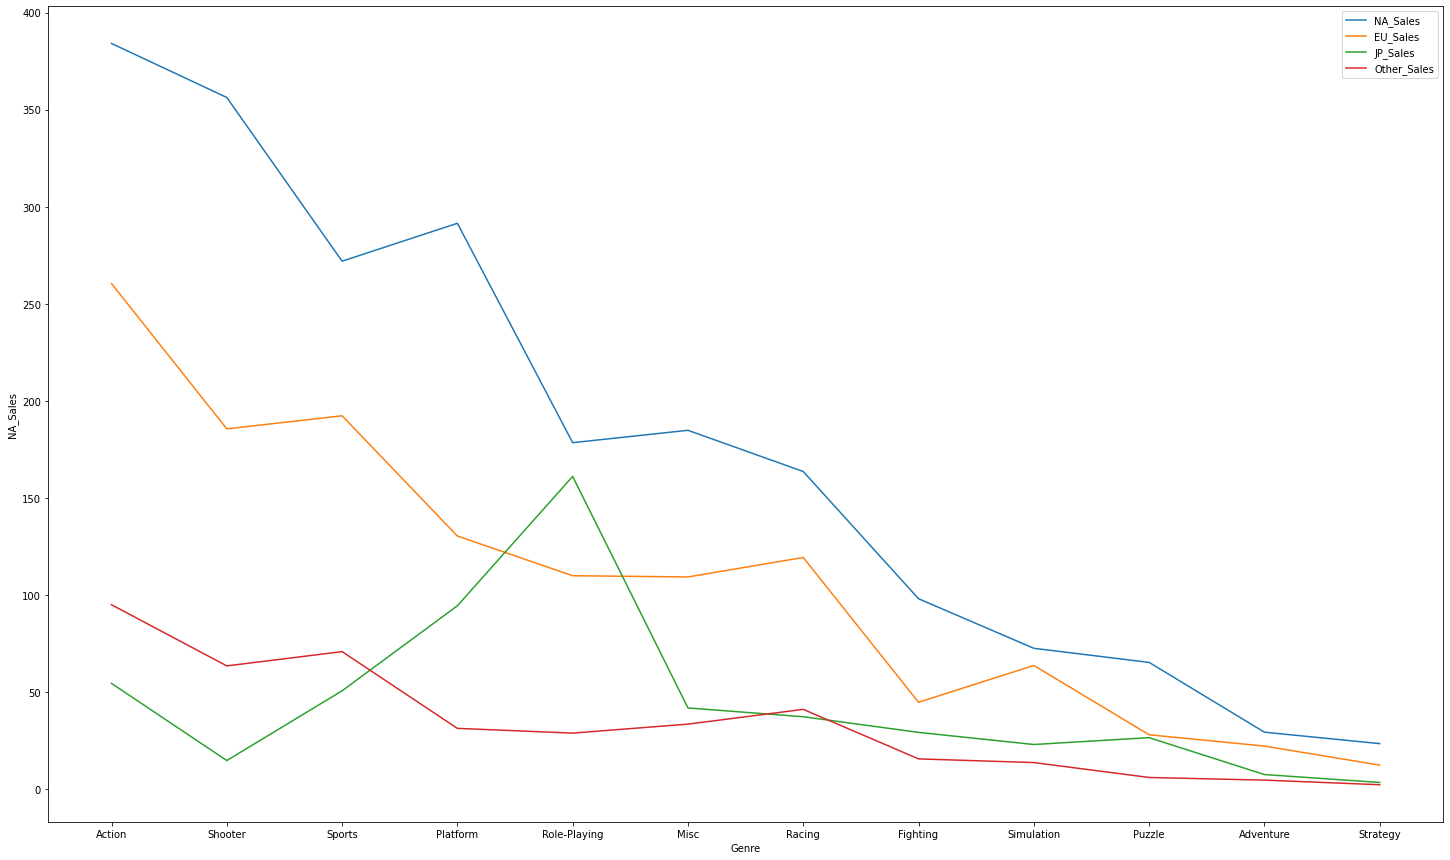

In [99]:
#선 시각화
import seaborn as sns
import matplotlib.pyplot as plt

Genre=Top_Sales4.index
plt.figure(figsize=(25, 15))
sns.lineplot(Genre,Top_Sales4['NA_Sales'])
sns.lineplot(Genre,Top_Sales4['EU_Sales'])
sns.lineplot(Genre,Top_Sales4['JP_Sales'])
sns.lineplot(Genre,Top_Sales4['Other_Sales'])
#sns.lineplot(Genre,Top_Sales4['Total_Sales'])
plt.legend(Top_Sales4.columns)
plt.show()

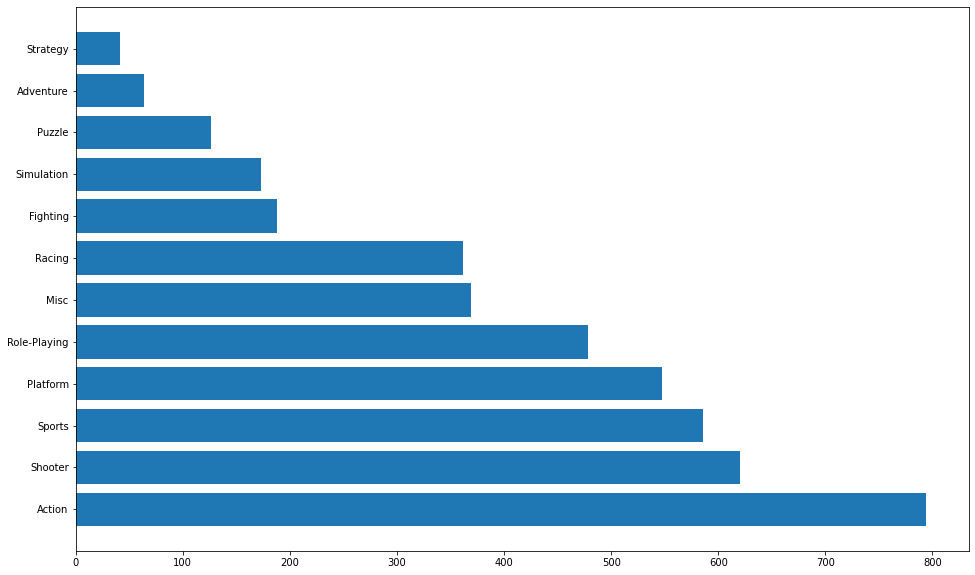

In [100]:
#선 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
Genre=Top_Sales4.index
plt.barh(Genre,Top_Sales4['Total_Sales'])
plt.show()

In [101]:
Top_Sales5=Top_Sales.groupby(['Platform']).sum()
Top_Sales5=Top_Sales5[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
Top_Sales5=Top_Sales5.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Top_Sales5

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
PS2,273.88,165.11,41.55,96.49,577.03
X360,336.99,154.52,4.36,47.83,543.70
Wii,265.04,171.83,44.32,48.36,529.55
PS3,198.70,189.08,23.70,77.21,488.69
DS,134.61,118.26,87.62,30.77,371.26
PS,156.31,101.39,46.30,15.51,319.51
GB,105.54,43.89,56.93,7.65,214.01
NES,109.15,17.33,58.82,4.70,190.00
PS4,62.36,85.38,5.26,29.08,182.08


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

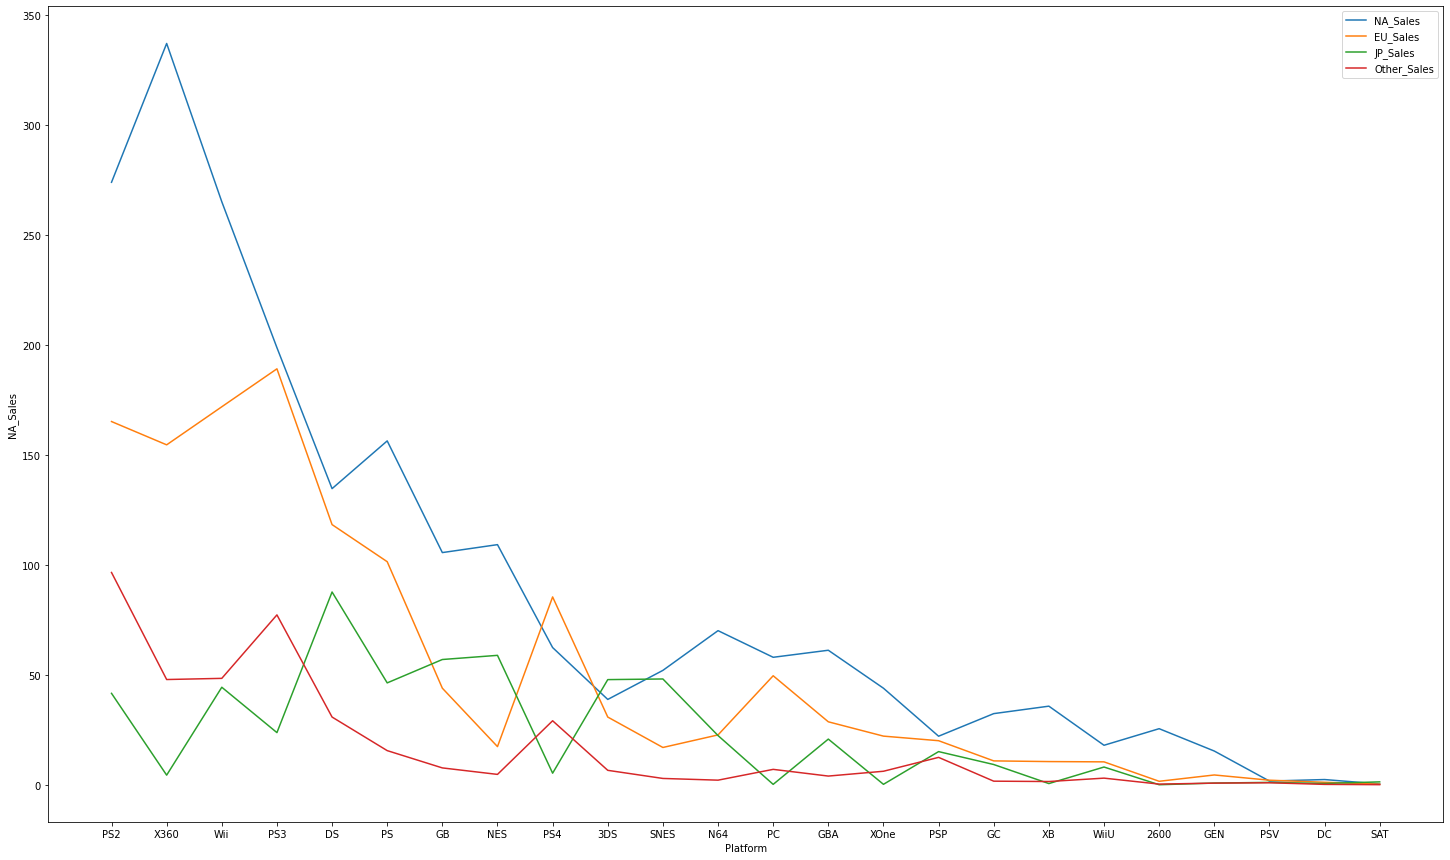

In [102]:
#선 시각화
import seaborn as sns
import matplotlib.pyplot as plt

Platform=Top_Sales5.index
plt.figure(figsize=(25, 15))
sns.lineplot(Platform,Top_Sales5['NA_Sales'])
sns.lineplot(Platform,Top_Sales5['EU_Sales'])
sns.lineplot(Platform,Top_Sales5['JP_Sales'])
sns.lineplot(Platform,Top_Sales5['Other_Sales'])
#sns.lineplot(Platform,Top_Sales5['Total_Sales'])
plt.legend(Top_Sales5.columns)
plt.show()

#### 연도별 플랫폼에도 트렌드가 있을까 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=플랫폼*으로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용


In [103]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [104]:
year_platform=df2[['Year','Platform']]

Total_Sales=df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
year_platform['Total_Sales']=Total_Sales
year_platform.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Year,Platform,Total_Sales
0,2008,DS,0.04
1,2009,Wii,0.18
2,2010,PSP,0.02
3,2010,DS,0.04
4,2010,PS3,0.25


In [105]:
year_platform_com = pd.crosstab(df2['Platform'], df2['Year'])
year_platform_com

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,8,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115,93,89,78,85,34,0,0
DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,115,200,376,488,402,323,149,23,9,1,0,0,0,1
GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,16,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,106,197,149,155,129,38,5,0,0,0,0,0,0,0,0,0,0,0
GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,151,142,82,97,40,4,0,0,0,0,0,0,0,0,0,0,0
GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
#그냥 크로스탭을 하면 0,1로 유무 판단의 합계가 되므로, Total_Sales의 합으로 값을 채우는 것이 더 의미있다고 판단
year_platform_com = pd.crosstab(index=year_platform['Platform'], columns=year_platform['Year'],values=year_platform['Total_Sales'], aggfunc = np.sum)
year_platform_com=year_platform_com.fillna(0)
year_platform_com

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,10.88,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62.33,51.10,41.32,43.11,26.82,6.54,0.00,0.00
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.38,5.16,5.99,1.07,0.29,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.41,130.61,120.92,148.62,146.85,121.73,72.52,27.52,11.55,1.96,0.02,0.00,0.00,0.00,0.29
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,4.89,5.57,25.49,0.00,12.18,3.60,36.03,6.37,26.90,38.00,19.56,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.35,74.11,56.64,72.62,32.36,5.20,2.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.34,51.74,49.74,28.61,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.60,4.33,12.64,0.65,8.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [107]:
#correlation 으로 확인하는 것이 유의미하다고 판단
corr_year_platform = year_platform_com.T.corr()
print(corr_year_platform)

Platform      2600       3DO       3DS  ...      X360        XB      XOne
Platform                                ...                              
2600      1.000000 -0.059823 -0.115082  ... -0.156064 -0.116703 -0.087681
3DO      -0.059823  1.000000 -0.075381  ... -0.102225 -0.076443 -0.057433
3DS      -0.115082 -0.075381  1.000000  ...  0.466309 -0.147054  0.504638
DC       -0.093165 -0.061025 -0.117394  ... -0.156225 -0.067687 -0.089443
DS       -0.136707 -0.089546 -0.085556  ...  0.641217  0.129510 -0.129545
GB       -0.132246 -0.017277 -0.180135  ... -0.244283 -0.157060 -0.137245
GBA      -0.114943 -0.075290 -0.144837  ... -0.176759  0.926708 -0.110351
GC       -0.116745 -0.076470 -0.147107  ... -0.164595  0.934066 -0.112081
GEN      -0.090228  0.073098 -0.113694  ... -0.154182 -0.115296 -0.086624
GG       -0.049025 -0.032112 -0.061775  ... -0.083773 -0.062645 -0.047066
N64      -0.114913 -0.075270 -0.144799  ... -0.196363 -0.135013 -0.110322
NES      -0.086201 -0.088786 -0.171388

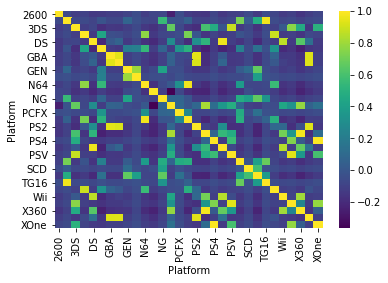

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_year_platform, cmap='viridis')
plt.show()

In [109]:
# 연도, 플랫폼 두 변수간 연관성 유무를 확인하기 위해 chi2_contingency 테스트 사용
from scipy.stats import chi2_contingency
'''
chi2_contingency 결과 해석
1 : x2 statistic // 2 : p-value // 3 : degree of freedom // 4 : expected value for Observed
'''
print(chi2_contingency(year_platform_com, correction = False)[1]) 
print(chi2_contingency(year_platform_com, correction = True)[1])

# 두 경우 모두 pvalue : 0.0 , 연도와 플랫폼 간 연관이 있다.

0.0
0.0


In [110]:
year_platform2=year_platform
year_platform2=year_platform.groupby(['Platform','Year']).sum()
year_platform2 = year_platform2.reset_index()
year_platform2

,Platform,Year,Total_Sales
0,2600,1980,10.88
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
236,XB,2008,0.18
237,XOne,2013,18.61
238,XOne,2014,52.44
239,XOne,2015,57.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


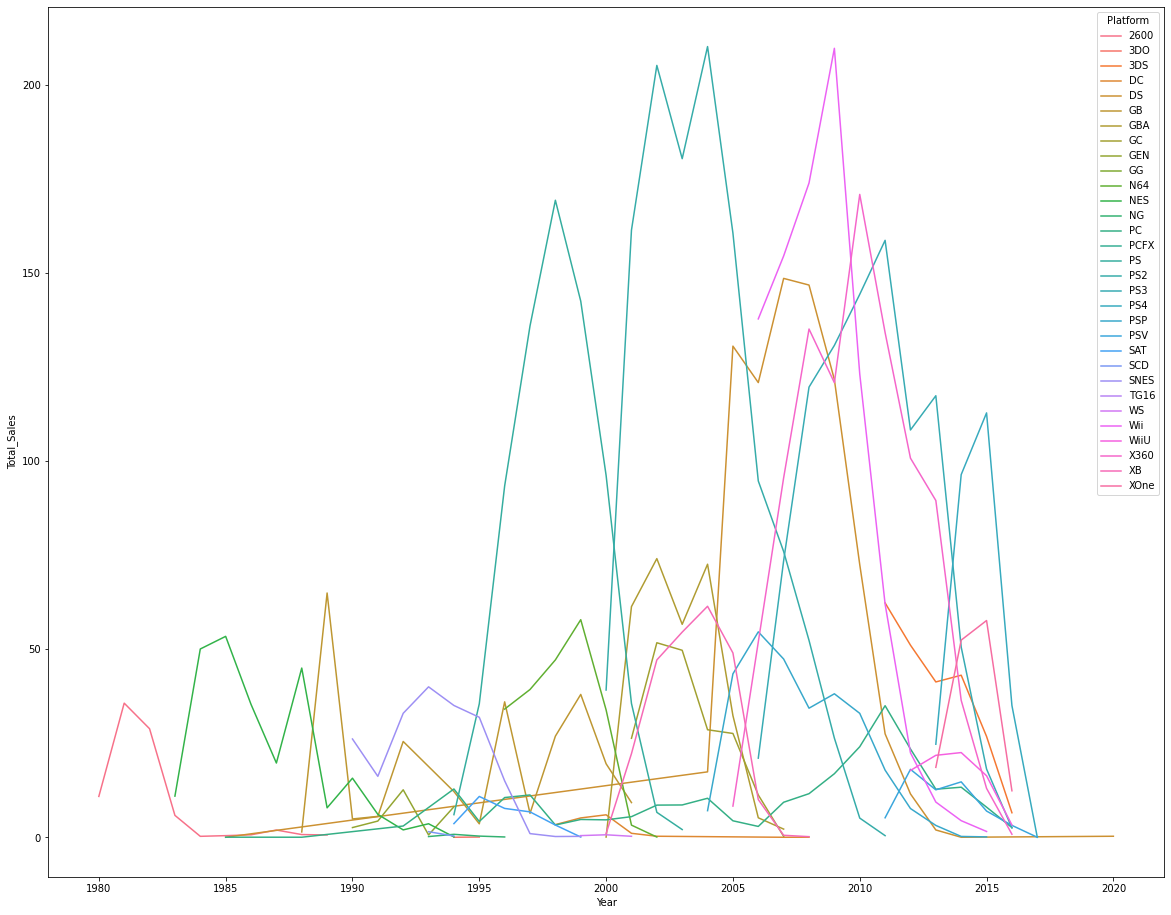

In [111]:
#선 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
sns.lineplot(year_platform2['Year'],year_platform2['Total_Sales'],hue=year_platform2['Platform'])
plt.show()

#### 제일 선호되는 회사와 지역에 따라서 선호하는 회사가 다를까 
> 전체적으로 랭킹 상위30 (575개의 회사), **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 회사 선호 장르를 차이를 따지기 위해 **ANOVA**사용(자국의 회사를 선호하는지?, 자국인지는 구글링 해보기)


In [112]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [113]:
Publishers=df2[['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Publishers['Total_Sales']=df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']

Publisher_rank=Publishers.groupby(['Publisher']).sum()
Publisher_rank=Publisher_rank.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Publisher_rank

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Nintendo,802.57,407.06,441.58,92.85,1744.06
Electronic Arts,578.58,364.76,13.98,126.78,1084.10
Activision,424.94,213.09,6.54,74.51,719.08
Sony Computer Entertainment,259.94,183.42,73.26,78.30,594.92
Ubisoft,251.72,162.92,7.33,50.06,472.03
...,...,...,...,...,...
Rain Games,0.00,0.01,0.00,0.00,0.01
Commseed,0.00,0.00,0.01,0.00,0.01
Naxat Soft,0.00,0.00,0.01,0.00,0.01


In [114]:
Publisher_NArank=Publisher_rank.sort_values(by=['NA_Sales'], axis=0, ascending=False)
Publisher_NArank[0:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Nintendo,802.57,407.06,441.58,92.85,1744.06
Electronic Arts,578.58,364.76,13.98,126.78,1084.10
Activision,424.94,213.09,6.54,74.51,719.08
Sony Computer Entertainment,259.94,183.42,73.26,78.30,594.92
Ubisoft,251.72,162.92,7.33,50.06,472.03
Take-Two Interactive,218.72,116.60,5.82,54.73,395.87
THQ,207.62,94.22,5.01,32.00,338.85
Microsoft Game Studios,154.98,68.41,3.26,18.51,245.16
Sega,108.51,81.19,54.87,24.21,268.78


In [115]:
Publisher_EUrank=Publisher_rank.sort_values(by=['EU_Sales'], axis=0, ascending=False)
Publisher_EUrank[0:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Nintendo,802.57,407.06,441.58,92.85,1744.06
Electronic Arts,578.58,364.76,13.98,126.78,1084.10
Activision,424.94,213.09,6.54,74.51,719.08
Sony Computer Entertainment,259.94,183.42,73.26,78.30,594.92
Ubisoft,251.72,162.92,7.33,50.06,472.03
Take-Two Interactive,218.72,116.60,5.82,54.73,395.87
THQ,207.62,94.22,5.01,32.00,338.85
Sega,108.51,81.19,54.87,24.21,268.78
Konami Digital Entertainment,88.45,68.52,90.76,29.88,277.61


In [116]:
Publisher_JPrank=Publisher_rank.sort_values(by=['JP_Sales'], axis=0, ascending=False)
Publisher_JPrank[0:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Nintendo,802.57,407.06,441.58,92.85,1744.06
Namco Bandai Games,68.74,42.33,125.22,14.54,250.83
Konami Digital Entertainment,88.45,68.52,90.76,29.88,277.61
Sony Computer Entertainment,259.94,183.42,73.26,78.30,594.92
Capcom,78.20,39.04,67.38,14.79,199.41
Sega,108.51,81.19,54.87,24.21,268.78
Square Enix,45.95,32.15,46.25,11.83,136.18
SquareSoft,10.44,4.53,39.44,1.42,55.83
Enix Corporation,0.76,0.31,32.40,0.27,33.74


In [117]:
Publisher_Otherrank=Publisher_rank.sort_values(by=['Other_Sales'], axis=0, ascending=False)
Publisher_Otherrank[0:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Electronic Arts,578.58,364.76,13.98,126.78,1084.10
Nintendo,802.57,407.06,441.58,92.85,1744.06
Sony Computer Entertainment,259.94,183.42,73.26,78.30,594.92
Activision,424.94,213.09,6.54,74.51,719.08
Take-Two Interactive,218.72,116.60,5.82,54.73,395.87
Ubisoft,251.72,162.92,7.33,50.06,472.03
THQ,207.62,94.22,5.01,32.00,338.85
Konami Digital Entertainment,88.45,68.52,90.76,29.88,277.61
Sega,108.51,81.19,54.87,24.21,268.78


In [118]:
Pub_NArank=Publisher_NArank.index
Pub_EUrank=Publisher_EUrank.index
Pub_JPrank=Publisher_JPrank.index
Pub_Otherrank=Publisher_Otherrank.index

Pub_com=pd.DataFrame()
Pub_com['Pub_NArank']=Pub_NArank
Pub_com['Pub_EUrank']=Pub_EUrank
Pub_com['Pub_JPrank']=Pub_JPrank
Pub_com['Pub_Otherrank']=Pub_Otherrank
Pub_com[0:10]

,Pub_NArank,Pub_EUrank,Pub_JPrank,Pub_Otherrank
0,Nintendo,Nintendo,Nintendo,Electronic Arts
1,Electronic Arts,Electronic Arts,Namco Bandai Games,Nintendo
2,Activision,Activision,Konami Digital Entertainment,Sony Computer Entertainment
3,Sony Computer Entertainment,Sony Computer Entertainment,Sony Computer Entertainment,Activision
4,Ubisoft,Ubisoft,Capcom,Take-Two Interactive
5,Take-Two Interactive,Take-Two Interactive,Sega,Ubisoft
6,THQ,THQ,Square Enix,THQ
7,Microsoft Game Studios,Sega,SquareSoft,Konami Digital Entertainment
8,Sega,Konami Digital Entertainment,Enix Corporation,Sega
9,Atari,Microsoft Game Studios,Tecmo Koei,Microsoft Game Studios


#### 출시이후 평균 판매량은 어떤지 확인하기, 전체적으로 또한 순위 재평가(상위 30개 게임)
> 출시이후 평균 판매량=총판매량/(지금년도-출시년도+1) 라는 수식을 사용(지금의 판매량은 누적이기 때문에 늦게 출시된 제품의 판매량이 떨어질 수 밖에 없다고 판단), 꾸준히 인기가 있는 게임이 있다면 원인은 무엇일까?

In [119]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [120]:
Sales_avg=df2[['Name','Platform','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Sales_avg['Total_Sales']=df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
Sales_avg['Avg_Sales']=Sales_avg['Total_Sales']/(2021-Sales_avg['Year']+1)
Sales_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Avg_Sales
0,Candace Kane's Candy Factory,DS,2008,0.04,0.00,0.00,0.00,0.04,0.002857
1,The Munchables,Wii,2009,0.17,0.00,0.00,0.01,0.18,0.013846
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,0.00,0.00,0.02,0.00,0.02,0.001667
3,Deal or No Deal: Special Edition,DS,2010,0.04,0.00,0.00,0.00,0.04,0.003333
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,0.12,0.09,0.00,0.04,0.25,0.020833
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,0.15,0.04,0.00,0.01,0.20,0.012500
16594,Rainbow Islands: Revolution,PSP,2005,0.01,0.00,0.00,0.00,0.01,0.000588
16595,NBA 2K16,PS3,2015,0.44,0.19,0.03,0.13,0.79,0.112857
16596,Toukiden: The Age of Demons,PSV,2013,0.05,0.05,0.25,0.03,0.38,0.042222


In [128]:
Sales_avg=Sales_avg.sort_values(by=['Avg_Sales'], axis=0, ascending=False)
print(Sales_avg.shape)

Sales_com=Sales_avg.sort_values(by=['Total_Sales'], axis=0, ascending=False)
print(Sales_avg[['Name','Platform']][0:20])
print(Sales_com[['Name','Platform']][0:20])

(16141, 9)
                                            Name Platform
2908                                  Wii Sports      Wii
12579                             Mario Kart Wii      Wii
3352                           Wii Sports Resort      Wii
3483                          Grand Theft Auto V      PS3
16531                  New Super Mario Bros. Wii      Wii
9070                   Call of Duty: Black Ops 3      PS4
6937                       New Super Mario Bros.       DS
10913                         Grand Theft Auto V     X360
4343                          Kinect Adventures!     X360
3014                                    Wii Play      Wii
10899                               Wii Fit Plus      Wii
3435                                     Wii Fit      Wii
2008                          Grand Theft Auto V      PS4
11137                                 Nintendogs       DS
4251   Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS
4240                  Call of Duty: Black Ops II      PS3
106

In [130]:
#상위 10% 비교 (1564/1600, 99.63%로 거의 일치)
count=0
for i in range(0,len(df)):
  for j in range(0,1600):
    try:
      if Sales_avg['Name'][i]==Sales_com['Name'][j]:
        if Sales_avg['Platform'][i]==Sales_com['Platform'][j]:
          count+=1
    except:
      continue

print(count)

1564


In [131]:
#상위 10~20% 비교 (1557/1600, 97.31%로 거의 일치)
count2=0
for i in range(0,len(df)):
  for j in range(1600,3200):
    try:
      if Sales_avg['Name'][i]==Sales_com['Name'][j]:
        if Sales_avg['Platform'][i]==Sales_com['Platform'][j]:
          count2+=1
    except:
      continue

print(count2)

1557


In [132]:
#상위 20~30% 비교 (1550/1600, 96.88%로 거의 일치)
count3=0
for i in range(0,len(df)):
  for j in range(3200,4800):
    try:
      if Sales_avg['Name'][i]==Sales_com['Name'][j]:
        if Sales_avg['Platform'][i]==Sales_com['Platform'][j]:
          count3+=1
    except:
      continue

print(count3)

1550


In [134]:
# 상위 100개에 대한 순위 조사 결과 순위가 아예 동일한 항목이 96개로 거의 일치, 누적판매량을 평균판매량으로 보아도 유의할 것이라 판단
count4=0
for i in range(0,100):
  try:
    if Sales_avg['Name'][i]==Sales_com['Name'][i]:
      if Sales_avg['Platform'][i]==Sales_com['Platform'][i]:
        count4+=1
  except:
    continue

print(count4)

96
